In [3]:
#Import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set(style='whitegrid', palette='coolwarm', font_scale=1.1)


In [4]:
X_train = pd.read_csv('cleaned_x_train.csv')
Y_train = pd.read_csv('cleaned_y_train.csv')

print(X_train.shape)
print(Y_train.shape)

(24158, 24)
(24158, 1)


In [5]:
df = X_train.copy()
df['risky_drinking'] = Y_train.values

In [6]:
df.info()
df.describe()
df.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24158 entries, 0 to 24157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ACEDEPRS        24158 non-null  float64
 1   ACEDRINK        24158 non-null  float64
 2   ACEDRUGS        24158 non-null  float64
 3   ACEPRISN        24158 non-null  float64
 4   ACEDIVRC        24158 non-null  float64
 5   ACEPUNCH        24158 non-null  float64
 6   ACEHURT1        24158 non-null  float64
 7   ACESWEAR        24158 non-null  float64
 8   ACETOUCH        24158 non-null  float64
 9   ACETTHEM        24158 non-null  float64
 10  ACEADSAF        24158 non-null  float64
 11  ACEADNED        24158 non-null  float64
 12  _EDUCAG         24158 non-null  float64
 13  _AGE80          24158 non-null  float64
 14  _SEX            24158 non-null  float64
 15  MENTHLTH        24158 non-null  float64
 16  PHYSHLTH        24158 non-null  float64
 17  _SMOKER3        24158 non-null 

ACEDEPRS          0
_AGE80            0
ACE_SCORE         0
race_6.0          0
race_5.0          0
race_4.0          0
race_3.0          0
race_2.0          0
_SMOKER3          0
PHYSHLTH          0
MENTHLTH          0
_SEX              0
_EDUCAG           0
ACEDRINK          0
ACEADNED          0
ACEADSAF          0
ACETTHEM          0
ACETOUCH          0
ACESWEAR          0
ACEHURT1          0
ACEPUNCH          0
ACEDIVRC          0
ACEPRISN          0
ACEDRUGS          0
risky_drinking    0
dtype: int64

## Distribution of Risky Drinking

/var/folders/kf/3gprn1fn25gcjl_y049yf6k40000gn/T/ipykernel_1710/3869334682.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='risky_drinking', palette='coolwarm')


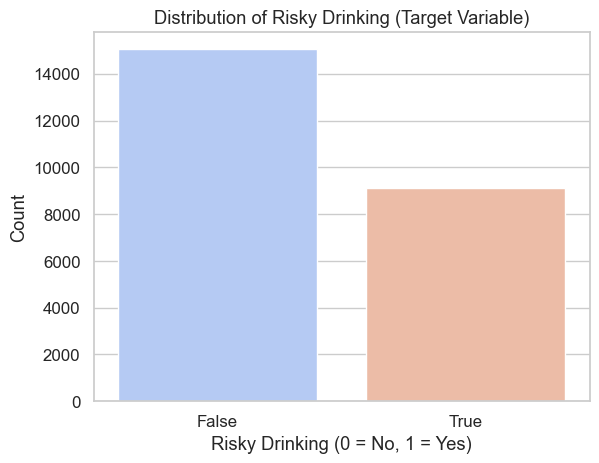

risky_drinking
False    62.29
True     37.71
Name: proportion, dtype: float64

In [ ]:
sns.countplot(data=df, x='risky_drinking', palette='coolwarm')
plt.title('Distribution of Risky Drinking (Outcome Variable)')
plt.xlabel('Risky Drinking (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

df['risky_drinking'].value_counts(normalize=True).mul(100).round(2)

The chart shows that about **62%** of respondents do not engage in risky drinking, while roughly **38%** report drinking four or more drinks per day. This means that more than one-third of the participants drink at levels considered risky. Although non-risky drinkers make up the majority, the share of risky drinkers is still substantial and highlights that heavy drinking behavior is relatively common in the surveyed group.

## Correlation Matrix for Non-ACE vs. ACE Variables

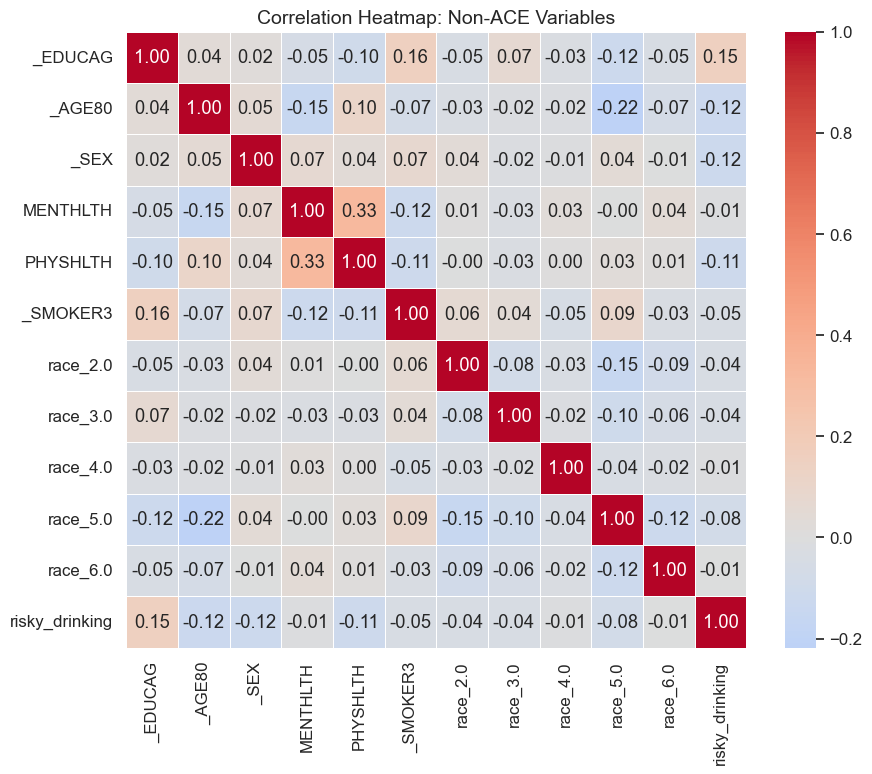

In [14]:
non_ace_cols = [col for col in df.columns if not col.startswith('ACE')]

non_ace_corr = df[non_ace_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(non_ace_corr, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Non-ACE Variables', fontsize=14)
plt.show()




### Correlation Between Non-ACE Variables and Risky Drinking

The heatmap shows correlations among demographic, behavioral, and health-related variables, including race, education, age, and smoking status.  
Most variables display weak correlations with `risky_drinking` (values between −0.15 and 0.15), suggesting that no single demographic factor strongly predicts risky drinking on its own.  

The strongest positive association appears with **education level (`_EDUCAG`, r ≈ 0.15)**, meaning respondents with higher education tend to report risky drinking slightly more often.  
There is also a weak negative correlation with **age (`_AGE80`, r ≈ −0.12)**, implying that younger participants are somewhat more likely to engage in risky drinking.  
Other variables, such as sex, smoking, and self-reported mental or physical health days, show minimal or no linear relationship.  

The one-hot encoded race variables (`race_2.0`–`race_6.0`) also exhibit very weak correlations with risky drinking, suggesting that drinking behavior is fairly consistent across racial and ethnic groups in this sample.

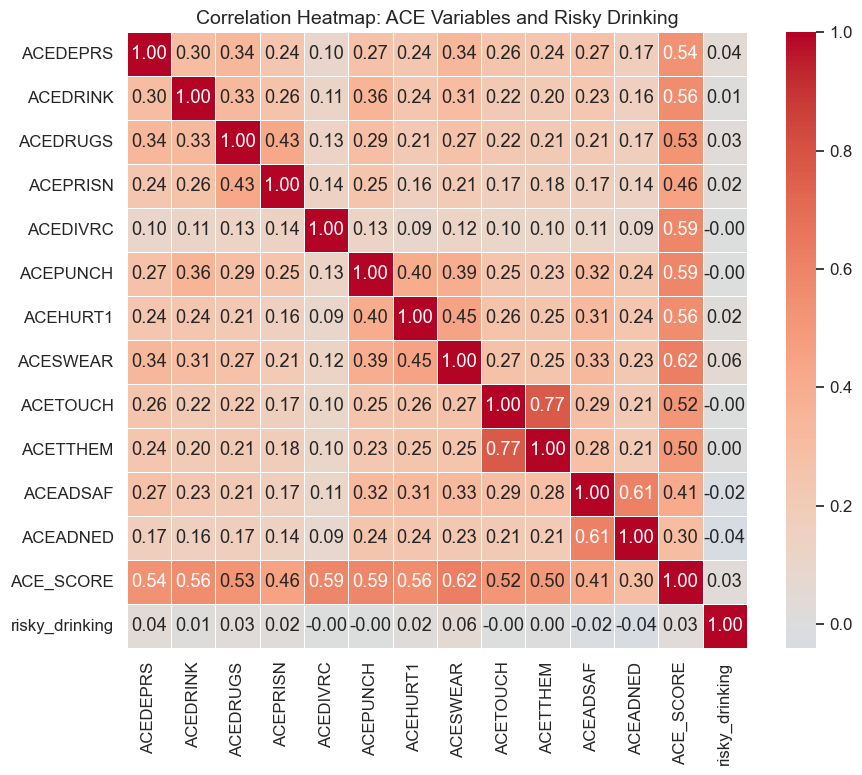

In [13]:
# Select all ACE columns + risky_drinking
ace_cols = [col for col in df.columns if col.startswith('ACE')] + ['risky_drinking']

# Compute correlation matrix
ace_corr = df[ace_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(ace_corr, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: ACE Variables and Risky Drinking', fontsize=14)
plt.show()



### Correlation Between ACE Variables and Risky Drinking

The correlation heatmap shows that most **Adverse Childhood Experience ** variables have very weak relationships with **risky drinking**.  
The correlation coefficients between individual ACE measures and `risky_drinking` range from approximately **0.00 to 0.06**, indicating almost no linear association.  
Even the overall `ACE_SCORE`, which summarizes total ACE exposure, shows only a small correlation (0.03) with risky drinking.  

This suggests that while ACE exposure and risky alcohol use may still be related in complex ways, their relationship does not appear to be strongly linear.  
It’s possible that other factors such as age, gender, income, or mental health conditions may moderate or interact with the effect of ACEs on alcohol consumption.  
In other words, having more adverse experiences in childhood does not consistently predict risky drinking behavior across this sample when considered in isolation.

## Frequency of ACE Variables

/var/folders/kf/3gprn1fn25gcjl_y049yf6k40000gn/T/ipykernel_1710/3203220675.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ace_counts.index, rotation=45, ha='right')


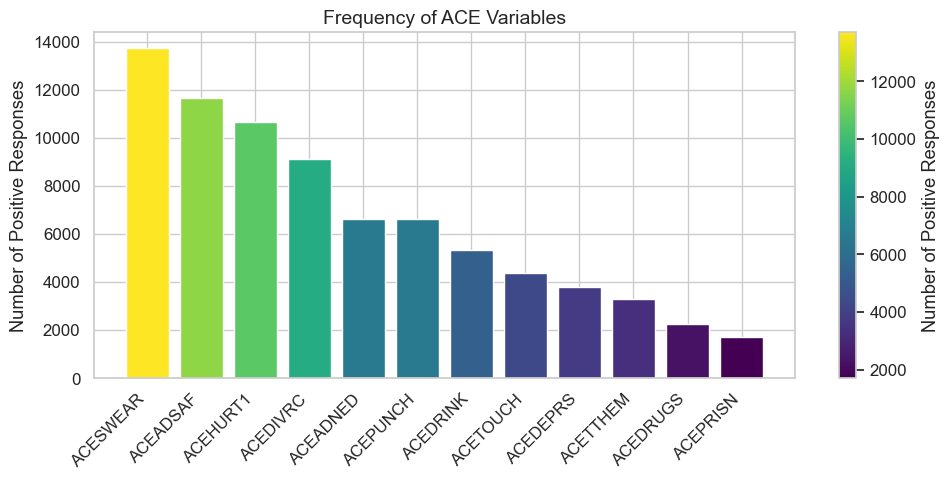

In [ ]:
ace_cols = [col for col in df.columns if col.startswith('ACE') and col not in ['ACE_SCORE', 'ACE_TOTAL']]

# ACE counts
ace_counts = df[ace_cols].sum().sort_values(ascending=False)

# Color mapping
norm = plt.Normalize(vmin=ace_counts.min(), vmax=ace_counts.max())
colors = plt.cm.viridis(norm(ace_counts.values))

fig, ax = plt.subplots(figsize=(10,5))

# Bar plot
bars = ax.bar(ace_counts.index, ace_counts.values, color=colors)
ax.set_title('Frequency of ACE Variables', fontsize=14)
ax.set_ylabel('Number of Positive Responses')
ax.set_xticklabels(ace_counts.index, rotation=45, ha='right')

# Add colorbar and link it to the normalization
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Number of Positive Responses')

plt.tight_layout()
plt.show()

This bar chart displays how frequently each Adverse Childhood Experience (ACE) variable was reported as a “positive” (i.e., experienced) response. The most common ACEs include ACESWEAR (verbal abuse), ACEADSAF (feeling unsafe at home), and ACEHURT1 (physical abuse), indicating that forms of emotional and physical mistreatment were the most prevalent among respondents. Less common experiences, such as ACEPRISN (household member imprisoned) and ACEDRUGS (exposure to substance abuse), appear at the lower end of the chart. Overall, the figure highlights that emotional neglect and household instability are more widespread ACE factors in the sample than direct substance- or crime-related exposures.

## Age vs Risky Drinking & Education vs Risky Drinking Plots

/var/folders/kf/3gprn1fn25gcjl_y049yf6k40000gn/T/ipykernel_1710/31368216.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risky_drinking', y='_AGE80', palette='RdBu_r')


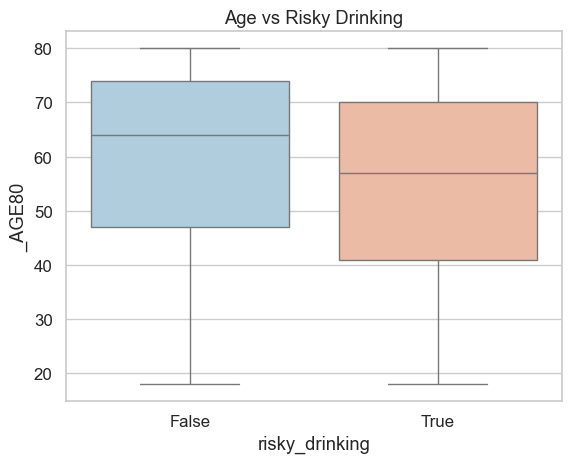

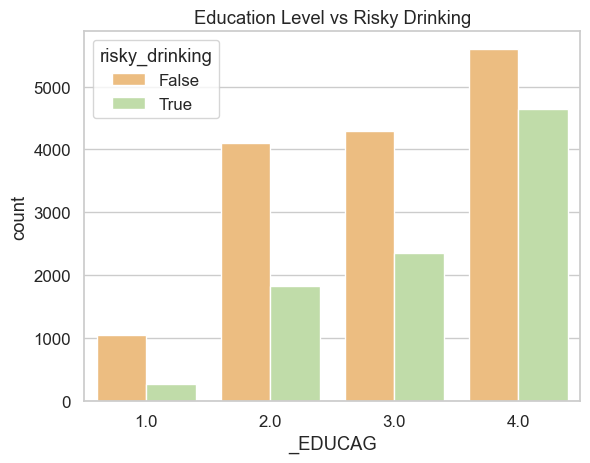

In [22]:
sns.boxplot(data=df, x='risky_drinking', y='_AGE80', palette='RdBu_r')
plt.title('Age vs Risky Drinking')
plt.show()

sns.countplot(data=df, x='_EDUCAG', hue='risky_drinking', palette='Spectral')
plt.title('Education Level vs Risky Drinking')
plt.show()


### Age
This boxplot compares respondents’ ages between those who reported risky drinking and those who did not. The median age of risky drinkers appears noticeably younger, while non-risky drinkers are generally older. The distributions show that younger adults are more likely to engage in risky drinking behaviors, while older adults tend to report lower rates. Both groups have a few respondents in the lower age range, but there are no significant outliers.

### Education Level
This bar chart shows the relationship between education level and risky drinking behavior. Individuals with higher education levels (categories 3 and 4, attended or graduated college) report more instances of risky drinking compared to those with lower education. However, the overall number of non-risky drinkers remains slightly higher in every education group. This pattern may indicate that people with higher education levels are more likely to engage in social drinking.

## Not Good Mental Health Days by Risky Drinking & Not Good Physical Health Days by Risky Drinking

/var/folders/kf/3gprn1fn25gcjl_y049yf6k40000gn/T/ipykernel_1710/293131888.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risky_drinking', y='MENTHLTH', palette='PiYG')


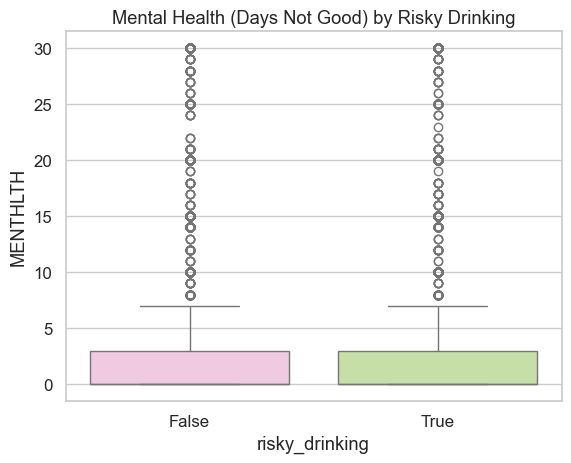

/var/folders/kf/3gprn1fn25gcjl_y049yf6k40000gn/T/ipykernel_1710/293131888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risky_drinking', y='PHYSHLTH', palette='seismic')


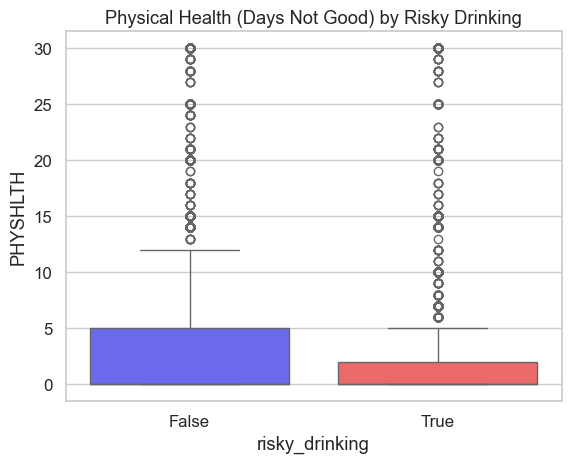

In [23]:
sns.boxplot(data=df, x='risky_drinking', y='MENTHLTH', palette='PiYG')
plt.title('Mental Health (Days Not Good) by Risky Drinking')
plt.show()

sns.boxplot(data=df, x='risky_drinking', y='PHYSHLTH', palette='seismic')
plt.title('Physical Health (Days Not Good) by Risky Drinking')
plt.show()

### Mental Health
This boxplot compares the number of mentally “not good” days reported by individuals who engage in risky drinking versus those who do not. Both groups show a similar median and overall distribution, indicating that risky drinkers do not report substantially worse mental health in terms of the number of bad days. However, both groups some outliers. For instance, individuals reporting up to 30 bad mental health days in a month is suggesting that some respondents experience frequent emotional distress regardless of drinking behavior.

### Physical Health
This boxplot compares the number of days of poor physical health between risky drinkers and non-risky drinkers. Both groups have similar distributions, but risky drinkers appear to report slightly fewer poor physical health days on average. The majority of respondents in both groups report few or no unhealthy days, while a subset of individuals in each group report up to 30 days, visible as outliers. These outliers indicate that some respondents experience persistent health challenges.